# Base Maps

This example reviews adding a basemap to a GeoDataFrame plot.

In [1]:
import geopandas as gpd
import mapped
mapped.__version__, gpd.__version__

('19.12.1', '0.6.2')

In [2]:
nybb = gpd.read_file(gpd.datasets.get_path('nybb'))

Importing `mapped` monkeypatches `geopandas` to add several 
features to the `geopandas.GeoDataFrame.plot` method.

First, it adds the keyword argument `basemap`, which adds a contextual 
background map to plots.  Set to `True` to 
get a default terrain map style from Stamen Design.

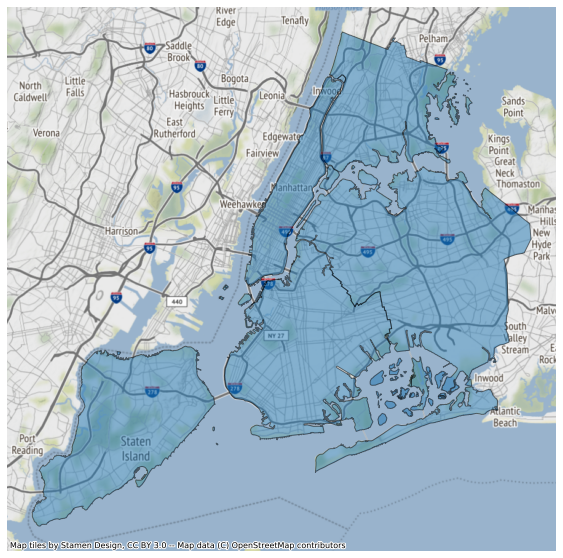

In [3]:
nybb.plot(figsize=(10, 10), alpha=0.5, edgecolor='k', basemap=True);

Or set to a string naming a style offered by `contextily` to get other map styles.
See a list of tile providers 
[here](https://github.com/darribas/contextily/blob/master/contextily/_providers.py).

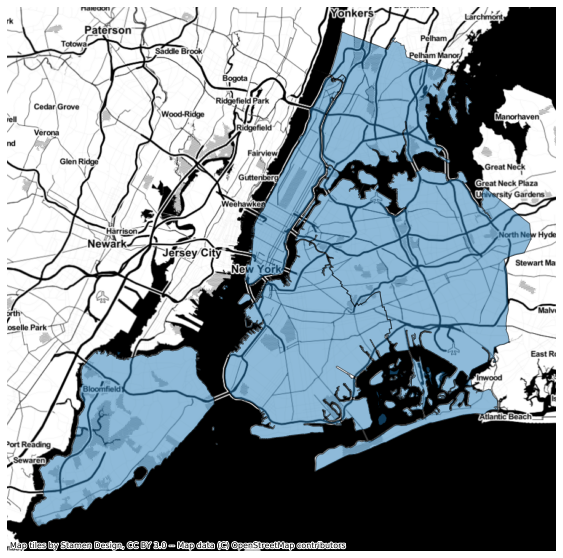

In [4]:
nybb.plot(figsize=(10, 10), alpha=0.5, edgecolor='k', basemap='Stamen.Toner');

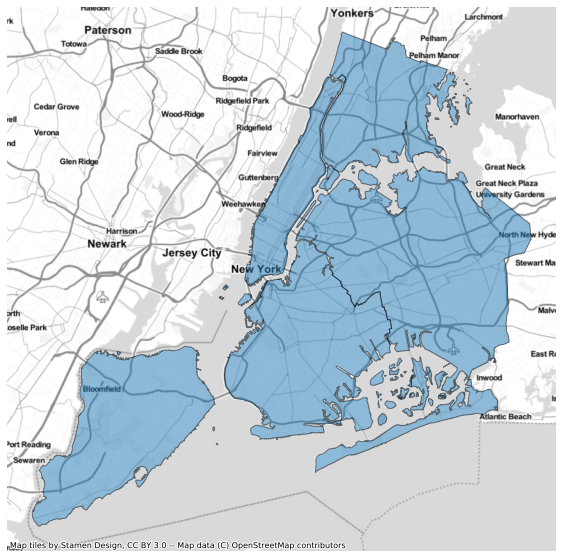

In [5]:
nybb.plot(figsize=(10, 10), alpha=0.5, edgecolor='k', basemap='Stamen.TonerLite');

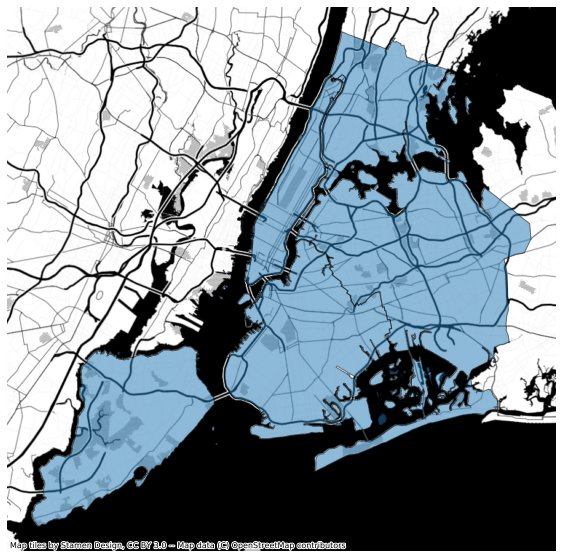

In [6]:
nybb.plot(figsize=(10, 10), alpha=0.5, edgecolor='k', basemap='Stamen.TonerBackground');

Note that a coordinate reference system (crs) must be defined on the 
GeoDataFrame if it is not already in Web Mercator (EPSG:3857).  Otherwise,
the map tiles will probably not align correctly and you will get unexpected
results.

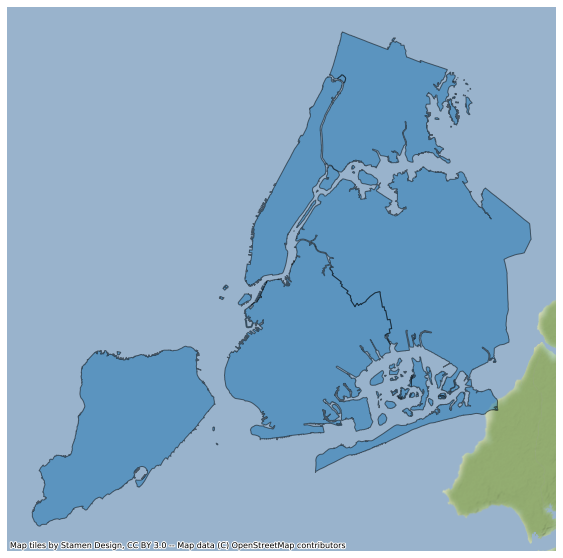

In [7]:
nybb2 = nybb.copy()
nybb2.crs = None
nybb2.plot(figsize=(10, 10), alpha=0.5, edgecolor='k', basemap=True);

When calling the `plot` method, the CRS is attached to the subplot axes 
as `crs`, and this is used to ensure that subsequent map objects drawn to
the same axes are rendered correctly, even if they use a different CRS.

In [8]:
import osmnx as ox
newark = ox.gdf_from_place("Newark, NJ")
newark.crs, nybb.crs

('+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs', {'init': 'epsg:2263'})

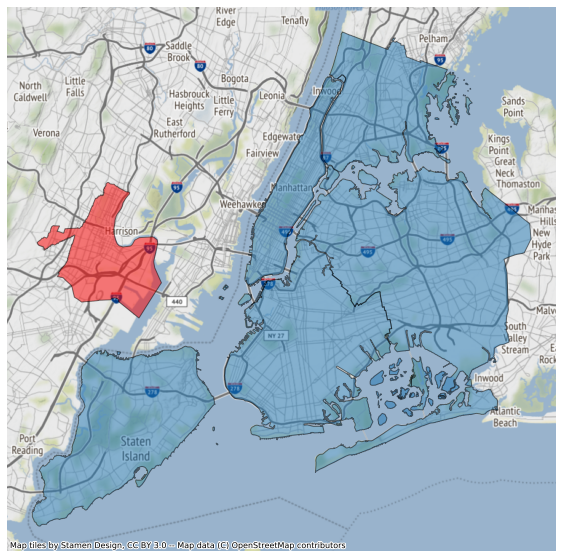

In [9]:
ax = nybb.plot(figsize=(10, 10), alpha=0.5, edgecolor='k', basemap=True)
newark.plot(ax=ax, alpha=0.5, color='r', edgecolor='k');

Mapped also offers a seperate `add_basemap` method to attach a basemap
to an existing matplotlib `AxesSubplot`.

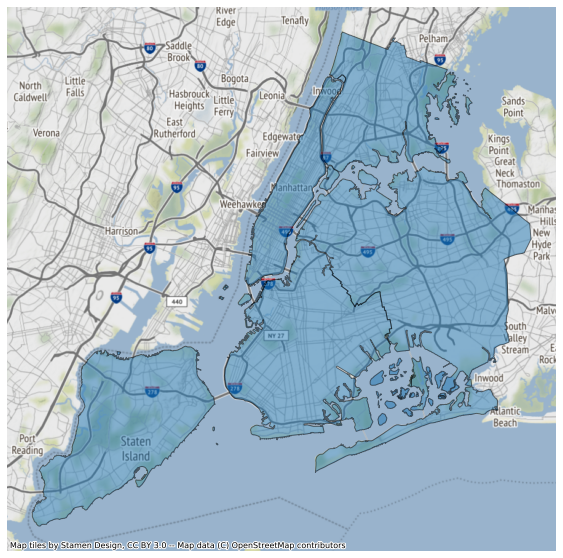

In [10]:
ax = nybb.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
mapped.add_basemap(ax, axis='off');

This is particularly useful when you want to add multiple sets of overlay
tiles, for example to add map labels floating above the objects you draw.

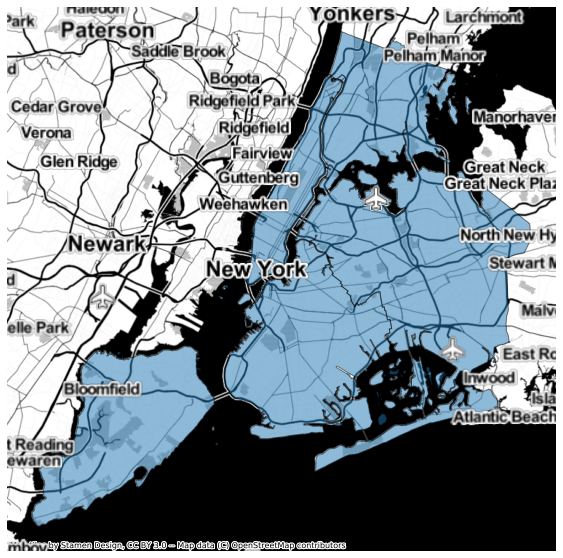

In [11]:
ax = nybb.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
mapped.add_basemap(ax, axis='off', tiles='Stamen.TonerBackground')
mapped.add_basemap(ax, axis='off', tiles='Stamen.TonerLabels', zoom=10);